# Import libraries and data

In [158]:
# import libraries 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.linear_model import ElasticNet, SGDClassifier, LogisticRegression, Lasso
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, balanced_accuracy_score, classification_report, \
                            roc_auc_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.svm import SVC, LinearSVC

In [103]:
data_path = os.getcwd() + "/Datasets/"
fig_path = os.getcwd() + "/Figures/"

## Feature brain data set

In [141]:
df_features = pd.read_csv(data_path + "/Features/df_features_brain.csv")
df_features

Uniprot                                           Sequence  Length  \
0     Q8TDC3  MSSGAKEGGGGSPAYHLPHPHPHPPQHAQYVGPYRLEKTLGKGQTG...     778   
1     P48065  MDGKVAVQECGPPAVSWVPEEGEKLDQEDEDQVKDRGQWTNKMEFV...     614   
2     Q9Y250  MGSVSSLISGHSFHSKHCRASQYKLRKSSHLKKLNRYSDGLLRFGF...     596   
3     P0DMW5  MAASAALSAAAAAAALSGLAVRLSRSAAARGSYGAFCKGLTRTLLT...      78   
4     P21579  MVSESHHEALAAPPVTTVATVLPSNATEPASPGEGKEDAFSKLKEK...     422   
...      ...                                                ...     ...   
2537  Q8IZU8  MALMFTGHLLFLALLMFAFSTFEESVSNYSEWAVFTDDIDQFKTQK...    1212   
2538  Q4JDL3  MSSPRDFRAEPVNDYEGNDSEAEDLNFRETLPSSSQENTPRSKVFE...     420   
2539  Q8N4V2  MEEDLFQLRQLPVVKFRRTGESARSEDDTASGEHEVQIEGVHVGLE...     548   
2540  P48426  MATPGNLGSSVLASKTKTKKKHFVAQKVKLFRASDPLLSVLMWGVN...     406   
2541  P0DPQ6                 MLKMSGWQRQSQNQSWNLRRECSRRKCIFIHHHT      34   

      Molecular weight         A         C         D         E         F  \
0           85085.7493  0.051414  0.012853  0.043702  0.065553  0.029563   
1           69367.5176  0.052117  0.037459  0.030945  0.043974  0.083062   
2           66612.1565  0.060403  0.011745  0.041946  0.104027  0.023490   
3            8388.8176  0.230769  0.012821  0.012821  0.012821  0.064103   
4           47572.5391  0.063981  0.014218  0.061611  0.082938  0.045024   
...                ...       ...       ...       ...       ...       ...   
2537       139235.8716  0.067657  0.009076  0.045380  0.048680  0.063531   
2538        48422.3273  0.047619  0.019048  0.057143  0.083333  0.052381   
2539        60768.4670  0.085766  0.023723  0.031022  0.062044  0.056569   
2540        46224.0440  0.056650  0.009852  0.068966  0.073892  0.046798   
2541         4283.9085  0.000000  0.058824  0.000000  0.029412  0.029412   

             G  ...  PS00028  PS00022  PS01186  Glycosylation  GlycoMine_N  \
0     0.092545  ...        0        0        0              0            1   
1     0.081433  ...        0        0        0              1            1   
2     0.072148  ...        0        0        0              1            1   
3     0.051282  ...        0        0        0              0            0   
4     0.059242  ...        0        0        0              0            0   
...        ...  ...      ...      ...      ...            ...          ...   
2537  0.055281  ...        0        0        0              0            0   
2538  0.045238  ...        0        0        0              0            0   
2539  0.082117  ...        0        0        0              1            0   
2540  0.051724  ...        0        0        0              0            0   
2541  0.029412  ...        0        0        0              0            0   

      GlycoMine_O  GlycoMine_C  GPI-anchor  Signal peptide  CSF  
0               1            0           0               0    1  
1               0            0           0               0   -1  
2               1            0           0               0   -1  
3               0            0           0               0   -1  
4               1            0           0               0    1  
...           ...          ...         ...             ...  ...  
2537            0            0           0               1   -1  
2538            0            0           0               0   -1  
2539            0            0           0               0   -1  
2540            1            0           0               0   -1  
2541            0            0           0               0   -1  

[2542 rows x 75 columns]

# Machine Learning

## Preprocessing

### Train test set split

In [144]:
# define variables and target
X = (df_features.drop(["Uniprot", "Sequence", "CSF"], axis=1))
y = (df_features["CSF"])

# split into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

### Scaling

In [108]:
# continuous variables
cont = ['Length', 'Molecular weight', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
       'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y',
       'Isoelectric point', 'Instability index', 'Polar', 'Neutral',
       'Hydrophobic', 'Volume_small', 'Volume_medium', 'Volume_large',
       'Polarity_low', 'Polarity_medium', 'Polarity_large',
       'Polarizability_low', 'Polarizability_medium', 'Polarizability_large',
       'Charge_positive', 'Charge_neutral', 'Charge_negative', 'Buried',
       'Exposed', 'Intermediate', 'Disorder_NSP', 'Helix_NSP', 'Turn_NSP',
       'Sheet_NSP', 'Solubility']

In [145]:
# scale continuous variables
scaler = StandardScaler()
X_train_scal = X_train.copy()
X_train_scal[cont] = scaler.fit_transform(X_train_scal[cont])
X_test_scal = X_test.copy()
X_test_scal[cont] = scaler.transform(X_test_scal[cont])

### Undersampling

In [163]:
# undersample majority class
undersample = RandomUnderSampler()
X_train_bal, y_train_bal = undersample.fit_resample(X_train_scal, y_train)

## Model selection

In [182]:
def model_selection(model, X_train, X_test, y_train, y_test, n=5):
    """
    """
    
    # create empty list to save performance measurements
    bac = []
    f1 = []
    auc = []
    
    # continuous variables
    cont = ['Length', 'Molecular weight', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I',
       'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y',
       'Isoelectric point', 'Instability index', 'Polar', 'Neutral',
       'Hydrophobic', 'Volume_small', 'Volume_medium', 'Volume_large',
       'Polarity_low', 'Polarity_medium', 'Polarity_large',
       'Polarizability_low', 'Polarizability_medium', 'Polarizability_large',
       'Charge_positive', 'Charge_neutral', 'Charge_negative', 'Buried',
       'Exposed', 'Intermediate', 'Disorder_NSP', 'Helix_NSP', 'Turn_NSP',
       'Sheet_NSP', 'Solubility']

    for i in range(n):

        # split into training and test 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

        # scale continuous variables
        scaler = StandardScaler()
        X_train_scal = X_train.copy()
        X_train_scal[cont] = scaler.fit_transform(X_train_scal[cont])
        X_test_scal = X_test.copy()
        X_test_scal[cont] = scaler.transform(X_test_scal[cont])

        # undersample majority class
        undersample = RandomUnderSampler()
        X_train_bal, y_train_bal = undersample.fit_resample(X_train_scal, y_train)
        
        # fit classifier to training data
        model.fit(X_train_bal, y_train_bal)
        # predict on test set
        y_pred = model.predict(X_test_scal) 
        
        # measure performance of model
        bac.append(balanced_accuracy_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
        auc.append(roc_auc_score(y_test, y_pred))
        
        
    print("Balanced accuracy: %.3f" % np.mean(bac))
    print("F1-score: %.3f" % np.mean(f1))
    print("AUC: %.3f" % np.mean(auc))

    return np.mean(bac), np.mean(f1), np.mean(auc)

In [184]:
# train the model

models = [RandomForestClassifier(n_estimators=1000),
         AdaBoostClassifier(),
         LinearSVC(C=0.1, max_iter=10000),
         LogisticRegression(max_iter=10000)]

for model in models:
    print(model)
    model_selection(model, X_train, X_test, y_train, y_test, n=5)
    print("--------------")

RandomForestClassifier(n_estimators=1000)
Balanced accuracy: 0.724
F1-score: 0.669
AUC: 0.724
--------------
AdaBoostClassifier()
Balanced accuracy: 0.688
F1-score: 0.633
AUC: 0.688
--------------
LinearSVC(C=0.1, max_iter=10000)


C:\Users\kathi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kathi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kathi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kathi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kathi\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Balanced accuracy: 0.720
F1-score: 0.665
AUC: 0.720
--------------
LogisticRegression(max_iter=10000)
Balanced accuracy: 0.720
F1-score: 0.665
AUC: 0.720
--------------


In [186]:
# lasso = Lasso(max_iter=10)
lr = LogisticRegression(max_iter=10000, penalty="l1", solver="saga")
lr.fit(X_train_bal, y_train_bal)
y_pred = lr.predict(X_test_scal)
print(lr.coef_)

[[ 0.20774323  0.15072118  0.14129233 -0.07648315  0.         -0.05385057
  -0.15403415  0.0952495  -0.1650397  -0.04041335  0.1454133  -0.1449257
   0.01962686  0.1538496   0.          0.07942506  0.         -0.19614535
   0.09571194  0.09350245 -0.24721213  0.04744662 -0.3301574  -0.0471925
   0.0910354   0.01515812 -0.14105484  0.04457018 -0.01201562  0.
  -0.1124684   0.03331412  0.05317707  0.09711905 -0.08859201  0.
   0.13124904 -0.02732737 -0.02904645 -0.00811319  0.07592854 -0.09189494
  -0.08421315 -0.13686865  0.          0.23223878 -0.01369815  0.00515138
   0.03384357 -0.02846915 -0.29443172  0.38837175  0.05863576 -1.07459699
   0.17177135  0.         -0.01051725  0.34815425 -0.05584419  0.
   0.01618671 -0.136332   -0.17269737 -0.13177165  0.12344182  0.08894916
  -0.03504914  0.24813419  0.31927603  0.03282216  0.1553781   1.02333078]]


In [207]:
# for i in range(len(lr.coef_[0])):
#     print(X_train_bal.columns[i], "%.3f" % lr.coef_[0][i])
    
coef_lr_l1 = pd.Series(index=X_train_bal.columns, data=lr.coef_[0])
print(coef_lr_l1[coef_lr_l1 != 0].sort_values(ascending=False, key=abs)[:20])
print("-----------")
print(coef_lr_l1[coef_lr_l1 != 0].sort_values(ascending=False, key=abs)[-20:])

Nucleus             -1.074597
Signal peptide       1.023331
Extracellular        0.388372
Golgi_apparatus      0.348154
Isoelectric point   -0.330157
GlycoMine_O          0.319276
Cytoplasm           -0.294432
GlycoMine_N          0.248134
W                   -0.247212
Sheet_NSP            0.232239
Length               0.207743
S                   -0.196145
PS00027             -0.172697
Cell_membrane        0.171771
H                   -0.165040
GPI-anchor           0.155378
F                   -0.154034
N                    0.153850
Molecular weight     0.150721
K                    0.145413
dtype: float64
-----------
Polarity_large       0.053177
Y                    0.047447
Instability index   -0.047192
Volume_small         0.044570
I                   -0.040413
Glycosylation       -0.035049
First60ExpAA         0.033844
Polarity_medium      0.033314
GlycoMine_C          0.032822
Charge_negative     -0.029046
PredHel             -0.028469
Charge_neutral      -0.027327
M            

In [204]:
coef_lr_l1[coef_lr_l1 == 0]

D                        0.0
P                        0.0
R                        0.0
Volume_large             0.0
Polarizability_large     0.0
Turn_NSP                 0.0
Endoplasmic_reticulum    0.0
Plastid                  0.0
dtype: float64

In [ ]:
# mlp = MLPClassifier(alpha=1, max_iter=1000)
# mlp.fit(train_X_balanced, train_y_balanced)
# y_pred = mlp.predict(test_X_scal) 

In [226]:
# eln = ElasticNet(alpha=1.0, l1_ratio=1)
# eln.fit(train_X_balanced, train_y_balanced)
# y_pred = eln.predict(test_X_scal) 

In [236]:
# sgd = SGDClassifier(penalty="elasticnet")
# sgd.fit(train_X_balanced, train_y_balanced)
# y_pred = sgd.predict(test_X_scal) 

In [192]:
# save model
#### TO DO ####

## Model evaluation

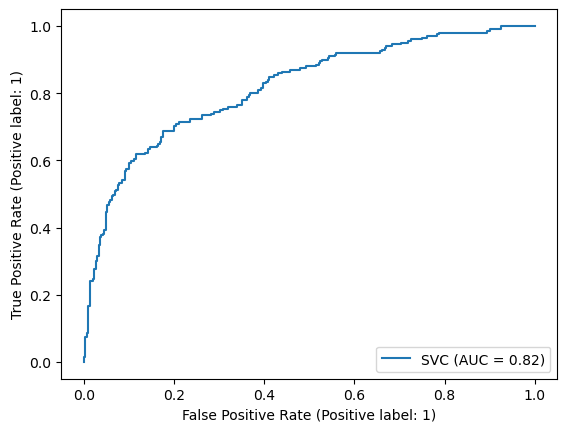

In [67]:
# RocCurveDisplay.from_predictions(test_y, y_pred)
RocCurveDisplay.from_estimator(svc, test_X_scal, test_y)
# RocCurveDisplay.from_estimator(rf, test_X_scal, test_y)


plt.show()

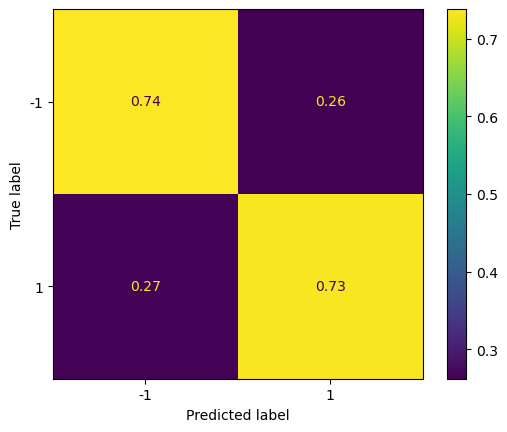

In [68]:
ConfusionMatrixDisplay.from_predictions(test_y, y_pred, normalize="true")
plt.show()

In [69]:
print("Balanced accuracy:", balanced_accuracy_score(test_y, y_pred))

Balanced accuracy: 0.7357662096892228


In [70]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

          -1       0.81      0.74      0.77       309
           1       0.64      0.73      0.69       199

    accuracy                           0.74       508
   macro avg       0.73      0.74      0.73       508
weighted avg       0.75      0.74      0.74       508



## Feature importance

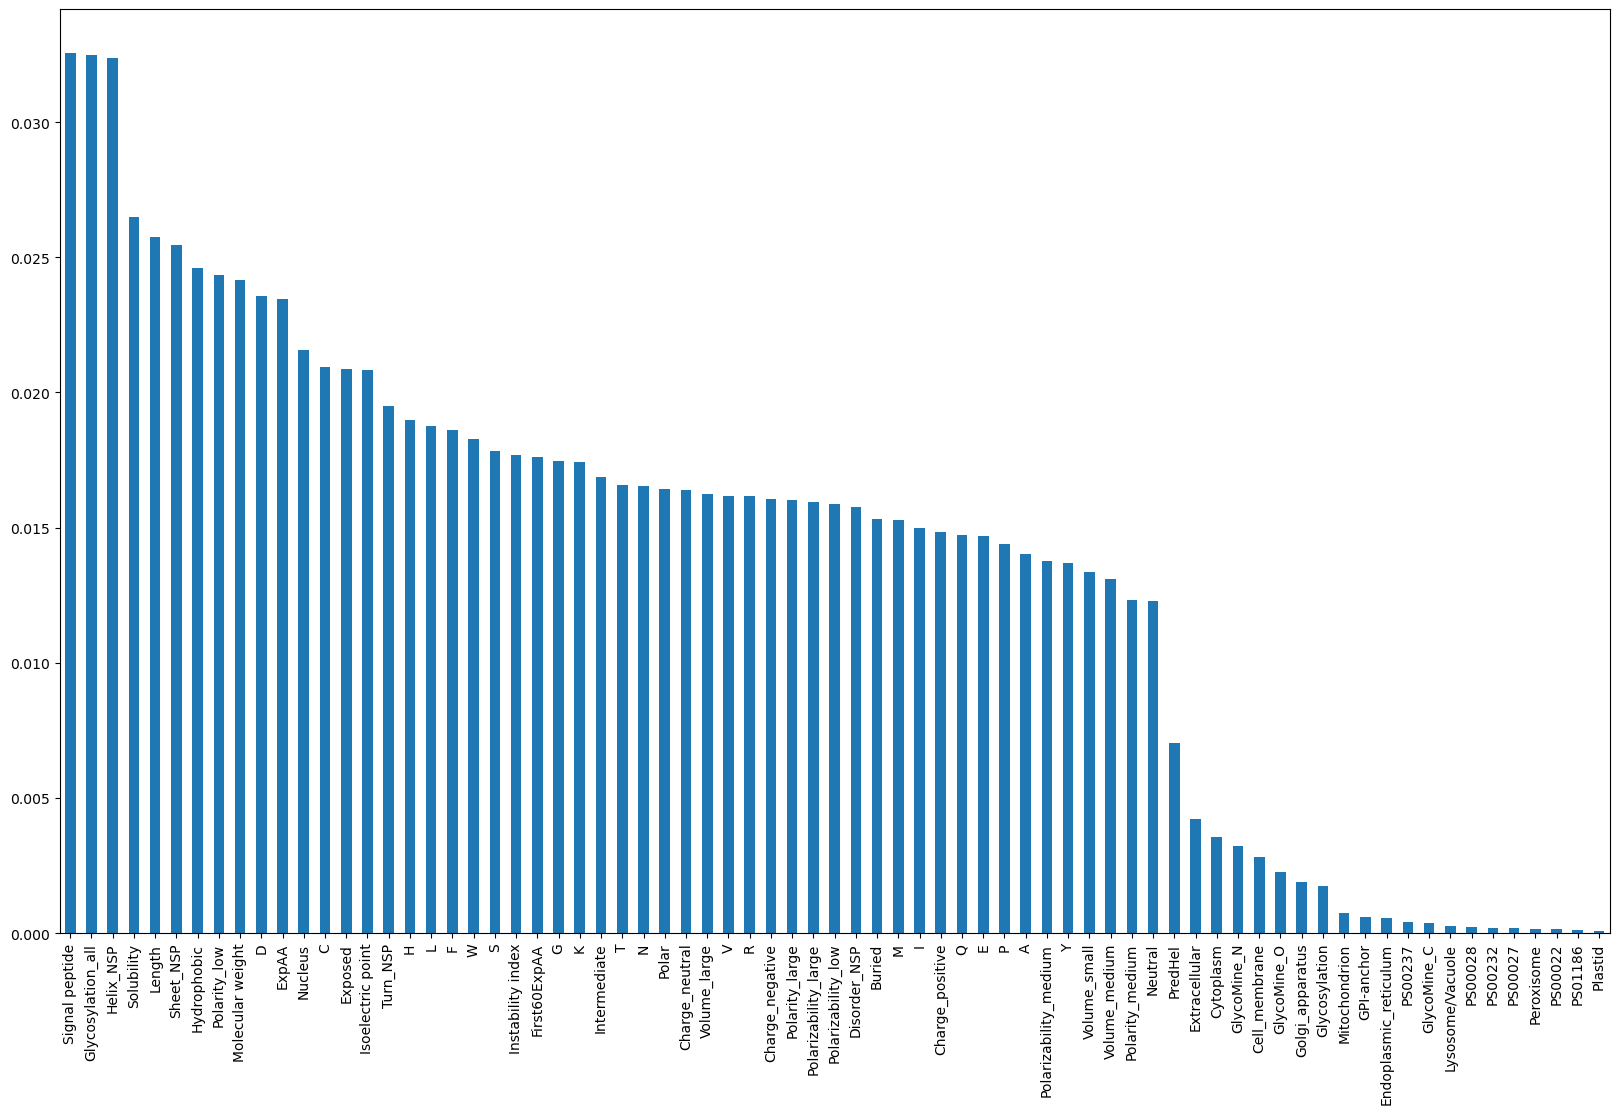

In [58]:
feature_importance = pd.Series(index = train_X.columns, data = rf.feature_importances_)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(20,12))
plt.show()

# Check influence of CSF dataset stringency

In [116]:
for i in range(1, csf["#Studies"].max()+1):
    print(i, len(csf[csf["#Studies"]>=i]))

1 5724
2 3422
3 2527
4 2022
5 1634
6 1165
7 572


In [117]:
df_features["CSF"].value_counts()

-1    1547
 1     995
Name: CSF, dtype: int64

In [118]:
uniprot_2plus_csf_studies = csf[csf["#Studies"]>=2]["Uniprot"]
print(len(uniprot_2plus_csf_studies))
uniprot_4plus_csf_studies = csf[csf["#Studies"]>=4]["Uniprot"]
print(len(uniprot_4plus_csf_studies))

3422
2022


In [119]:
remove_csf_2plus = set(df_features[df_features["CSF"] == 1]["Uniprot"]) - set(uniprot_2plus_csf_studies)
print(len(remove_csf_2plus))
remove_csf_4plus = set(df_features[df_features["CSF"] == 1]["Uniprot"]) - set(uniprot_4plus_csf_studies)
print(len(remove_csf_4plus))

303
521


In [120]:
df_2plus = df_features.drop(df_features[(df_features["CSF"] == 1) & (df_features["Uniprot"].isin(remove_csf_2plus))].index)
df_2plus["CSF"].value_counts()

-1    1547
 1     692
Name: CSF, dtype: int64

In [121]:
df_4plus = df_features.drop(df_features[(df_features["CSF"] == 1) & (df_features["Uniprot"].isin(remove_csf_4plus))].index)
df_4plus["CSF"].value_counts()

-1    1547
 1     474
Name: CSF, dtype: int64

In [59]:
def increase_stringency(feature_df, csf_df, i):
    
    stringent_csf = csf_df[csf_df["#Studies"]>=i]["Uniprot"]
    remove_csf = set(df_features[df_features["CSF"] == 1]["Uniprot"]) - set(stringent_csf)
    print("Number of CSF proteins to be removed:", len(remove_csf))
    df_stringent = df_features.drop(df_features[(df_features["CSF"] == 1) & (df_features["Uniprot"].isin(remove_csf))].index)
    
    return df_stringent

def accuracy_stringent(df):
    
    # define explanatory and response variables
    X = (df.drop(["Uniprot", "Sequence", "CSF"], axis=1))
    y = (df["CSF"])
    
    auc = []
    
    for i in range(5):
        # split 80% training and 20% test 
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y)

        rf = RandomForestClassifier(random_state=0, n_estimators=1000) 
        rf.fit(train_X, train_y)
        y_pred = rf.predict(test_X)
        
#         print(i, "Balanced accuracy:", balanced_accuracy_score(test_y, y_pred))
#         bac.append(balanced_accuracy_score(test_y, y_pred))
        
        print(i, "AUC:", roc_auc_score(test_y, y_pred))
        auc.append(roc_auc_score(test_y, y_pred))
        
    return auc

In [60]:
baclist = []
    
for i in range(1, csf["#Studies"].max()+1):
    
    print("Number of minimum CSF studies:", i)
    
    df_stringent = increase_stringency(df_features, csf, i)
    bac = accuracy_stringent(df_stringent)
    
    print("-------------")
    
    baclist.append(bac)

Number of minimum CSF studies: 1
Number of CSF proteins to be removed: 0
0 AUC: 0.7396903874209759
1 AUC: 0.7332063543524072
2 AUC: 0.7470416599124655
3 AUC: 0.739657967255633
4 AUC: 0.7599448857189172
-------------
Number of minimum CSF studies: 2
Number of CSF proteins to be removed: 303
0 AUC: 0.8228377746610565
1 AUC: 0.7986676016830294
2 AUC: 0.7942028985507247
3 AUC: 0.7700561009817672
4 AUC: 0.7676484338475923
-------------
Number of minimum CSF studies: 3
Number of CSF proteins to be removed: 454
0 AUC: 0.8093488649940264
1 AUC: 0.7582138590203107
2 AUC: 0.8141875746714456
3 AUC: 0.7706989247311828
4 AUC: 0.7986857825567504
-------------
Number of minimum CSF studies: 4
Number of CSF proteins to be removed: 521
0 AUC: 0.8021222410865876
1 AUC: 0.8154499151103565
2 AUC: 0.8037351443123939
3 AUC: 0.8174872665534804
4 AUC: 0.7774193548387097
-------------
Number of minimum CSF studies: 5
Number of CSF proteins to be removed: 588
0 AUC: 0.8000199123855037
1 AUC: 0.8064715252887296


In [62]:
baclist

[[0.7396903874209759,
  0.7332063543524072,
  0.7470416599124655,
  0.739657967255633,
  0.7599448857189172],
 [0.8228377746610565,
  0.7986676016830294,
  0.7942028985507247,
  0.7700561009817672,
  0.7676484338475923],
 [0.8093488649940264,
  0.7582138590203107,
  0.8141875746714456,
  0.7706989247311828,
  0.7986857825567504],
 [0.8021222410865876,
  0.8154499151103565,
  0.8037351443123939,
  0.8174872665534804,
  0.7774193548387097],
 [0.8000199123855037,
  0.8064715252887296,
  0.8188172043010752,
  0.7557546794105935,
  0.7791119076065312],
 [0.7669354838709678,
  0.8620967741935484,
  0.8255376344086022,
  0.7505376344086021,
  0.8387096774193549],
 [0.7279233870967742,
  0.7888104838709677,
  0.762399193548387,
  0.7139112903225806,
  0.6826612903225807]]

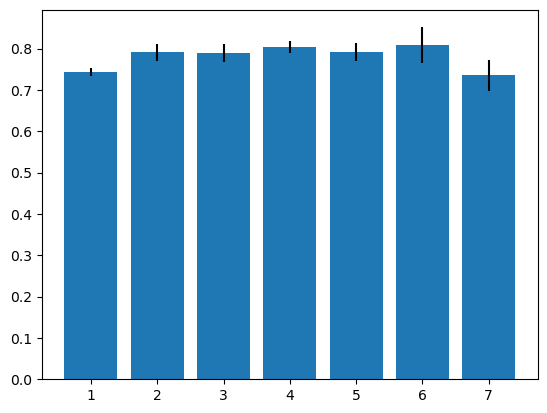

In [63]:
# sns.barplot(x=[1,2,3,4,5,6,7], y=[np.mean(i) for i in baclist], ci=[np.std(i) for i in baclist])
# sns.barplot(x=[1,2,3,4,5,6,7], y=baclist)

plt.bar(x=[1,2,3,4,5,6,7], height=[np.mean(i) for i in baclist], yerr=[np.std(i) for i in baclist])
plt.show()

In [ ]:
# penalty {‘l1’, ‘l2’}, default=’l2’
# Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. 
# The ‘l1’ leads to coef_ vectors that are sparse.

# dual bool, default=True
# Select the algorithm to either solve the dual or primal optimization problem. 
# Prefer dual=False when n_samples > n_features.

# C float, default=1.0
# Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

# max_iterint, default=1000
# The maximum number of iterations to be run.

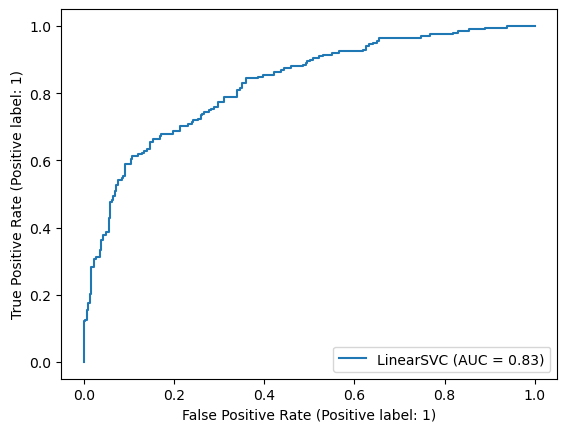

Length 0.145
Molecular weight -0.020
A 0.062
C -0.027
D 0.009
E -0.038
F -0.068
G 0.042
H -0.025
I -0.030
K 0.072
L -0.052
M 0.022
N 0.084
P -0.011
Q 0.025
R -0.009
S -0.091
T 0.055
V 0.043
W -0.124
Y 0.001
Isoelectric point -0.114
Instability index 0.015
Polar 0.039
Neutral 0.019
Hydrophobic -0.058
Volume_small 0.025
Volume_medium -0.012
Volume_large -0.013
Polarity_low -0.053
Polarity_medium 0.022
Polarity_large 0.035
Polarizability_low 0.042
Polarizability_medium -0.037
Polarizability_large -0.013
Charge_positive 0.056
Charge_neutral -0.015
Charge_negative -0.025
Buried -0.013
Exposed 0.039
Intermediate -0.039
Disorder_NSP -0.087
Helix_NSP -0.026
Turn_NSP -0.008
Sheet_NSP 0.054
Solubility -0.013
ExpAA 0.001
First60ExpAA 0.009
PredHel -0.008
Cytoplasm -0.172
Extracellular 0.143
Lysosome/Vacuole 0.404
Nucleus -0.707
Cell_membrane 0.045
Endoplasmic_reticulum 0.168
Mitochondrion -0.112
Golgi_apparatus 0.482
Peroxisome -0.232
Plastid -0.122
PS00232 -0.090
PS00237 -0.354
PS00027 -0.247
PS

In [128]:
svc = LinearSVC(C=0.1, penalty="l2", max_iter=100000, dual=False, random_state=0)
svc.fit(train_X_balanced, train_y_balanced)
RocCurveDisplay.from_estimator(svc, test_X_scal, test_y)
plt.show()

coef_svc_l2 = pd.Series(index=train_X_balanced.columns, data=svc.coef_[0])

for i in range(len(svc.coef_[0])):
    print(train_X_balanced.columns[i], "%.3f" % svc.coef_[0][i])

In [127]:
coef_svc_l2.sort_values(ascending=False)[]

Signal peptide      0.489694
Golgi_apparatus     0.481649
Lysosome/Vacuole    0.403505
PS00022             0.227427
PS01186             0.170701
                      ...   
Peroxisome         -0.232346
PS00027            -0.247028
PS00237            -0.353529
PS00028            -0.386809
Nucleus            -0.706575
Length: 72, dtype: float64

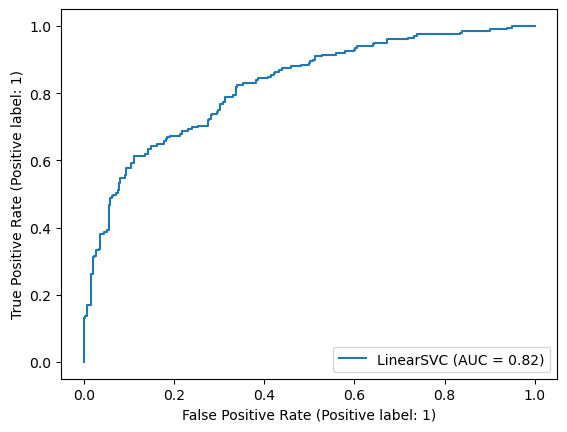

In [119]:
svc = LinearSVC(C=0.1, penalty="l1", max_iter=100000, dual=False, random_state=0)
svc.fit(train_X_balanced, train_y_balanced)
RocCurveDisplay.from_estimator(svc, test_X_scal, test_y)

plt.show()

coef_svc_l1 = pd.Series(index=train_X_balanced.columns, data=svc.coef_[0])
# for i in range(len(svc.coef_[0])):
#     print(train_X_balanced.columns[i], "%.3f" % svc.coef_[0][i])

In [135]:
coef_svc_l1[coef_svc_l1 != 0]

Length                   0.124888
A                        0.002889
D                        0.003924
F                       -0.083218
H                       -0.059737
I                       -0.007966
K                        0.083632
L                       -0.032928
N                        0.090864
Q                        0.038195
S                       -0.134632
T                        0.015455
V                        0.037261
W                       -0.125772
Isoelectric point       -0.094105
Polar                    0.001392
Polarity_low            -0.196455
Polarizability_low       0.070497
Polarizability_medium   -0.077078
Charge_positive          0.006427
Disorder_NSP            -0.056306
Sheet_NSP                0.079299
ExpAA                    0.000948
First60ExpAA             0.008884
Cytoplasm               -0.231269
Extracellular            0.011862
Nucleus                 -0.786741
Cell_membrane           -0.033168
Mitochondrion           -0.080151
Golgi_apparatu

In [138]:
parameters = {"C":[0.01, 0.1, 1, 10], "degree":[2, 3, 4]}
# svc = LinearSVC(max_iter=100000)
svc = SVC(kernel="poly")
grs = GridSearchCV(svc, parameters, verbose=2)
grs.fit(train_X_balanced, train_y_balanced)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................................C=0.01, degree=2; total time=   0.1s
[CV] END ...................................C=0.01, degree=2; total time=   0.1s
[CV] END ...................................C=0.01, degree=2; total time=   0.1s
[CV] END ...................................C=0.01, degree=2; total time=   0.1s
[CV] END ...................................C=0.01, degree=2; total time=   0.1s
[CV] END ...................................C=0.01, degree=3; total time=   0.1s
[CV] END ...................................C=0.01, degree=3; total time=   0.1s
[CV] END ...................................C=0.01, degree=3; total time=   0.1s
[CV] END ...................................C=0.01, degree=3; total time=   0.1s
[CV] END ...................................C=0.01, degree=3; total time=   0.1s
[CV] END ...................................C=0.01, degree=4; total time=   0.1s
[CV] END ...................................C=0.

GridSearchCV(estimator=SVC(kernel='poly'),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3, 4]},
             verbose=2)

In [140]:
pd.DataFrame(grs.cv_results_).sort_values("rank_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
10       0.742595      0.207474         0.033098        0.004772      10   
9        0.190252      0.006482         0.033224        0.003193      10   
6        0.175063      0.009926         0.033598        0.000800       1   
11       2.786318      0.744467         0.032022        0.000708      10   
8        0.740001      0.140310         0.032414        0.002057       1   
7        0.224855      0.011472         0.030607        0.002871       1   
4        0.163193      0.010612         0.033582        0.000994     0.1   
3        0.140071      0.007381         0.034858        0.002120     0.1   
5        0.279668      0.037871         0.032800        0.000765     0.1   
1        0.131320      0.005173         0.033197        0.000978    0.01   
2        0.166699      0.015511         0.035666        0.001012    0.01   
0        0.128357      0.006278         0.033803        0.001164    0.01   

   param_degree                    params  split0_test_score  \
10            3    {'C': 10, 'degree': 3}           0.531447   
9             2    {'C': 10, 'degree': 2}           0.525157   
6             2     {'C': 1, 'degree': 2}           0.531447   
11            4    {'C': 10, 'degree': 4}           0.537736   
8             4     {'C': 1, 'degree': 4}           0.531447   
7             3     {'C': 1, 'degree': 3}           0.525157   
4             3   {'C': 0.1, 'degree': 3}           0.518868   
3             2   {'C': 0.1, 'degree': 2}           0.525157   
5             4   {'C': 0.1, 'degree': 4}           0.525157   
1             3  {'C': 0.01, 'degree': 3}           0.512579   
2             4  {'C': 0.01, 'degree': 4}           0.503145   
0             2  {'C': 0.01, 'degree': 2}           0.500000   

    split1_test_score  split2_test_score  split3_test_score  \
10           0.536278           0.548896           0.545741   
9            0.539432           0.561514           0.542587   
6            0.526814           0.545741           0.539432   
11           0.536278           0.539432           0.523659   
8            0.529968           0.539432           0.533123   
7            0.536278           0.533123           0.536278   
4            0.529968           0.542587           0.523659   
3            0.526814           0.529968           0.520505   
5            0.529968           0.526814           0.517350   
1            0.517350           0.520505           0.523659   
2            0.517350           0.520505           0.514196   
0            0.498423           0.501577           0.498423   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
10           0.526814         0.537835        0.008361                1  
9            0.517350         0.537208        0.015259                2  
6            0.517350         0.532157        0.009857                3  
11           0.523659         0.532153        0.007006                4  
8            0.517350         0.530264        0.007218                5  
7            0.511041         0.528375        0.009574                6  
4            0.507886         0.524594        0.011536                7  
3            0.511041         0.522697        0.006581                8  
5            0.507886         0.521435        0.007948                9  
1            0.504732         0.515765        0.006621               10  
2            0.495268         0.510093        0.009444               11  
0            0.498423         0.499369        0.001262               12

In [ ]:
coef_svc_l1 = pd.Series(index=train_X_balanced.columns, data=svc.coef_[0])

In [137]:
grid_results_linear = pd.DataFrame(grs.cv_results_).sort_values("rank_test_score")

# Prediction on brain detected data set

## Create test data set

In [126]:
# brain_detected_test_set = brain_detected_set - brain_set
# len(brain_detected_test_set)

# df_features_test = df_features[df_features["Uniprot"].isin(list(brain_detected_test_set))]
# df_features_test

In [127]:
# test_brain = df_features_test.drop(["Uniprot", "Sequence"], axis=1)
# test_preds = pd.Series(rf.predict(test_brain))

In [128]:
# test_preds.value_counts(dropna=False)

In [129]:
# test_preds.index = test_brain.index
# test_brain_pos = test_brain[test_preds == 1]
# test_brain_neg = test_brain[test_preds == -1]

In [130]:
# test_brain_pos.columns

In [131]:
# test_proba = pd.DataFrame(rf.predict_proba(test_brain), columns=["not CSF", "CSF"])
# test_proba.sort_values(by="not CSF")
# test_proba

In [132]:
# test_proba.index = test_brain.index
# test_proba

In [133]:
# feature_df_test[["not CSF", "CSF"]] = test_proba
# feature_df_test

In [134]:
# feature_df_test.sort_values(by="CSF", ascending=False)[:30]

# Figures for CSF Society Meeting 2022 abstract

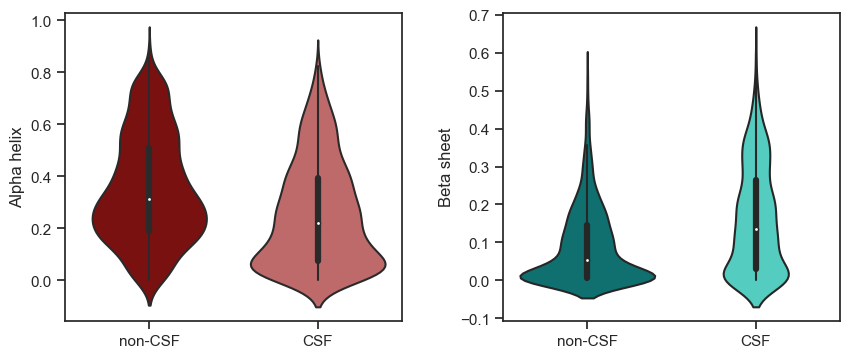

In [135]:
sns.set(style=("ticks"), font_scale=1)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(wspace=0.3)#, hspace=None)

sns.violinplot(y="Helix_NSP",  x="CSF", data=feature_df_brain, ax=axes[0], palette=["darkred", "indianred"])
axes[0].set(xlabel=None, ylabel="Alpha helix", xticklabels=["non-CSF", "CSF"])
sns.violinplot(y="Sheet_NSP",  x="CSF", data=feature_df_brain, ax=axes[1], palette=["teal", "turquoise"])
axes[1].set(xlabel=None, ylabel="Beta sheet", xticklabels=["non-CSF", "CSF"])

plt.show()